In [1]:
from qiskit import QuantumRegister, ClassicalRegister, AncillaRegister, QuantumCircuit, assemble, Aer, transpile
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

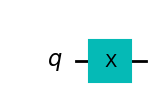

In [2]:
# quantum NOT gate
qreg_q = QuantumRegister(1, 'q')
circuit = QuantumCircuit(qreg_q, name='not')
circuit.x(qreg_q[0])

circuit.draw(output='mpl')

In [3]:
def V_Gate(inp):
    """A V-Gate

    Parameters:
        inp (str): Input, encoded in qubit 0

    Returns:
        QuantumCircuit: Output V_Gate circuit
        str: Output value measured from qubit 1.
    """

    qc = QuantumCircuit(2,2)
    qc.reset(0)
    qc.reset(1)

    # encode the input - if it is 0, don't do anything
    if inp == '1':
        qc.x(0)
    
    # barrier between input state and gate operation
    qc.barrier()

    # apply the controlled V-gate
    qc.csx(0, 1)
    qc.barrier()


    # measure the output
    qc.measure(0, 0)
    qc.measure(1,1)
    qc.draw(output='mpl')


    # We'll run the program on a simulator
    backend = AerSimulator() #Aer.get_backend('aer_simulator')
    
    # transpile the circuit
    qc_compiled = transpile(qc, backend)

    # execute the circuit
    job_sim = backend.run(qc_compiled, shots=1024)
    result_sim = job_sim.result()
    counts = result_sim.get_counts(qc_compiled)

    return qc, counts


In [4]:
def V_h_Gate(inp):
    """A V-inverse-Gate

    Parameters:
        inp (str): Input, encoded in qubit 0

    Returns:
        QuantumCircuit: Output V-Inverse_Gate circuit
        str: Output value measured from qubit 1.
    """

    qc = QuantumCircuit(2,2)
    qc.reset(0)
    qc.reset(1)

    # encode the input - if it is 0, don't do anything
    if inp == '1':
        qc.x(0)
    
    # barrier between input state and gate operation
    qc.barrier()

    # apply the controlled V-gate
    qc.csx(0, 1).inverse()
    qc.barrier()


    # measure the output
    qc.measure(0, 0)
    qc.measure(1,1)
    qc.draw(output='mpl')


    # We'll run the program on a simulator
    backend = AerSimulator() #Aer.get_backend('aer_simulator')
    
    # transpile the circuit
    qc_compiled = transpile(qc, backend)

    # execute the circuit
    job_sim = backend.run(qc_compiled, shots=1024)
    result_sim = job_sim.result()
    counts = result_sim.get_counts(qc_compiled)

    return qc, counts

    

V-Gate with input 0 gives output {'00': 1024}


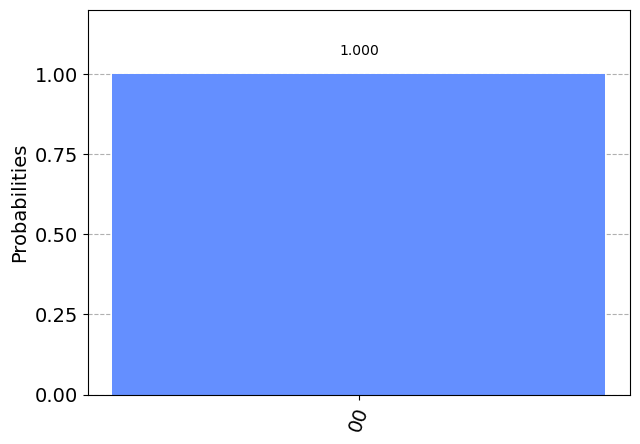

In [5]:
inp = "0" # "1"
qc, out = V_Gate(inp)
print('V-Gate with input',inp,'gives output',out)
qc.draw(output='mpl')

plot_histogram(out)

V-Gate with input 1 gives output {'11': 499, '01': 525}


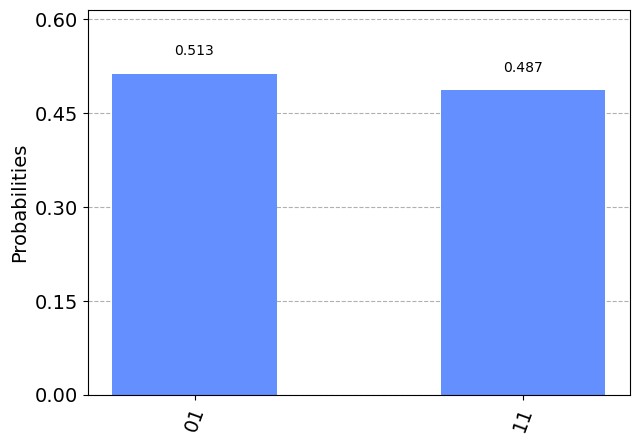

In [6]:
inp = "1" # "1"
qc, out = V_h_Gate(inp)
print('V-Gate with input',inp,'gives output',out)
qc.draw(output='mpl')

plot_histogram(out)

Create a controlled Custom gate and apply it to a circuit

https://quantumcomputing.stackexchange.com/questions/18107/how-to-construct-a-controlled-v-gate-in-qiskit

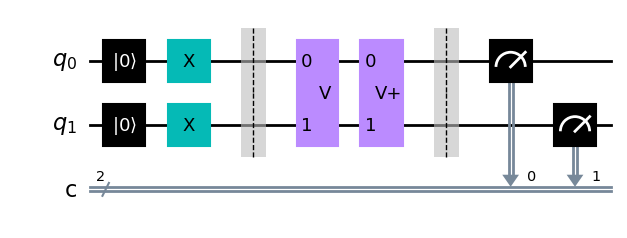

In [7]:
# Define the Controlled V gate
qc_v = QuantumCircuit(2)
qc_v.csx(0, 1)
V_Gate = qc_v.to_gate(label="V")

# Define the Controlled V inverse gate
qc_v_h = QuantumCircuit(2)
qc_v_h.csx(0, 1).inverse()
V_h_Gate = qc_v_h.to_gate(label="V+")


# Append the V gate to an existing circuit
qc = QuantumCircuit(2,2)

qc.reset(0)
qc.reset(1)

# Encode the input
qc.x(0)
qc.x(1)

qc.barrier()

# Perform the operations
qc.append(V_Gate, qargs=[0,1])
qc.append(V_h_Gate, qargs=[0,1])
qc.barrier()

# Measure the output
qc.measure(0,0)
qc.measure(1,1)


# Check if the gate is the correct one
qc_basis = qc.decompose()
qc_basis.draw(output="mpl")


# Run the program on a simulator
backend = AerSimulator() #Aer.get_backend('aer_simulator')

# transpile the circuit
qc_compiled = transpile(qc, backend)

# execute the circuit
job_sim = backend.run(qc_compiled, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc_compiled)

# Draw the circuit
qc.draw(output='mpl')





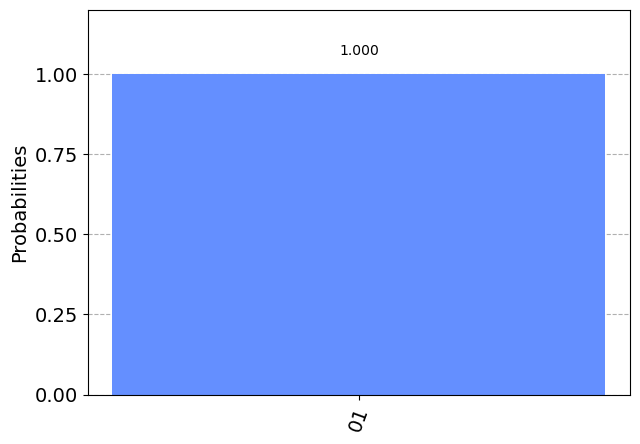

In [8]:
plot_histogram(counts)

In [9]:
from qiskit.circuit.library import SXdgGate

# Create a controlled version of V+ gate
csxdg = SXdgGate(label="V+").control(1)

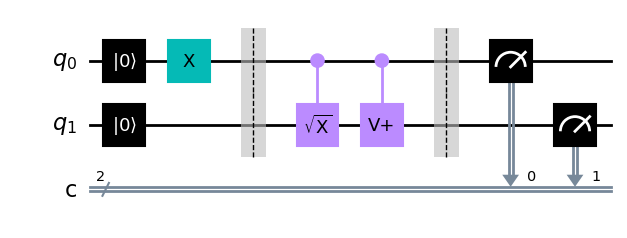

In [10]:
# Append the V gate to an existing circuit
qc = QuantumCircuit(2,2)

qc.reset(0)
qc.reset(1)

# Encode the input
qc.x(0)
#qc.x(1)

qc.barrier()

# Perform the operations

# apply the controlled V-gate
qc.csx(0, 1)
qc.append(csxdg, qargs=[0,1])

# Measure the output
qc.barrier()
qc.measure(0, 0)
qc.measure(1,1)


# draw it
qc.draw(output='mpl')

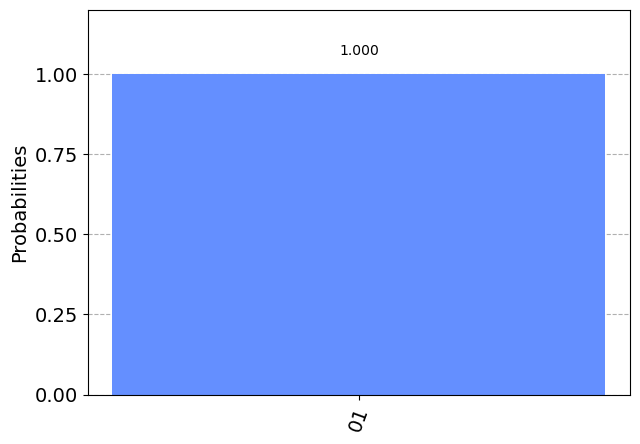

In [11]:
# Run the program on a simulator
backend = AerSimulator() #Aer.get_backend('aer_simulator')

# transpile the circuit
qc_compiled = transpile(qc, backend)

# execute the circuit
job_sim = backend.run(qc_compiled, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc_compiled)

# plot the histogram
plot_histogram(counts)

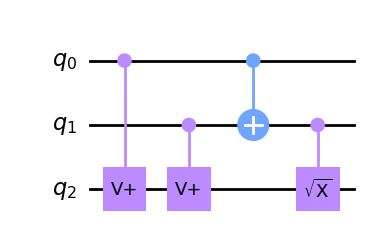

In [12]:
# Define the Peres gate
qc_peres = QuantumCircuit(3)
qc_peres.append(csxdg, qargs=[0,2])
qc_peres.append(csxdg, qargs=[1,2])
qc_peres.cnot(0,1)
qc_peres.csx(1,2)

Peres_Gate = qc_peres.to_gate(label="PG")

qc_peres.draw(output='mpl')

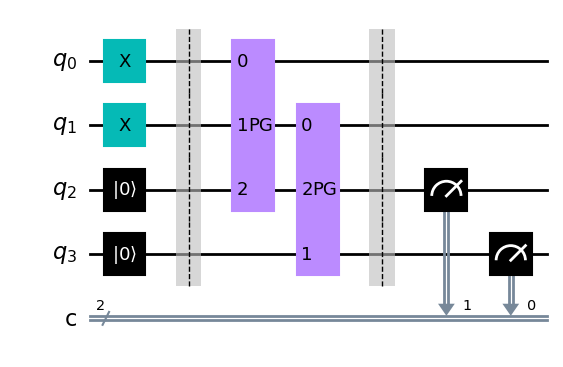

In [13]:
# Create a 1 bit FA using the Peres gate

qc = QuantumCircuit(4,2)

# Encode the input

C_in = 0

# encode 0 and 1 as inputs
a = 1
b = 1

if a:
    qc.x(0)
else:
    qc.reset(0) # A

if b:
    qc.x(1)
else:
    qc.reset(1)
    
qc.reset(2) # ancilla

if C_in == 0:
    qc.reset(3) # C_in
else:
    qc.x(3)

# In the hist plot, the result must be read as: sc (sum, carry)

qc.barrier()

# Perform the operations

# apply the controlled V-gate
qc.append(Peres_Gate, qargs=[0,1,2])



qc.append(Peres_Gate, qargs=[1,3,2])

# Measure the output
qc.barrier()
qc.measure(2, 1) # carry -> MSB
qc.measure(3,0)  # sum -> LSB


# draw it
qc.draw(output='mpl')

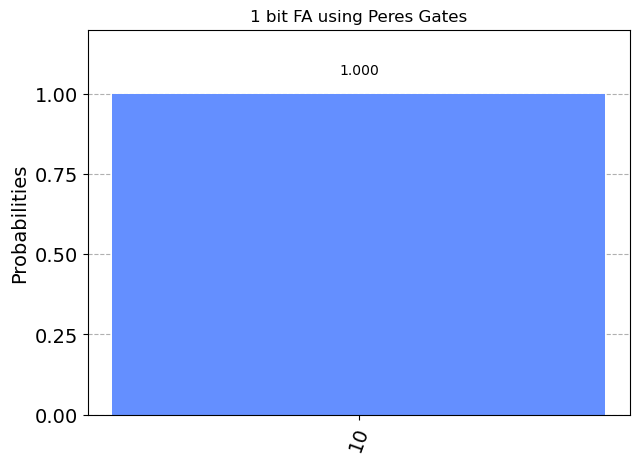

In [14]:
# Run the program on a simulator
backend = AerSimulator() #Aer.get_backend('aer_simulator')

# transpile the circuit
qc_compiled = transpile(qc, backend)

# execute the circuit
job_sim = backend.run(qc_compiled, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc_compiled)

# plot the histogram
plot_histogram(counts, title="1 bit FA using Peres Gates")

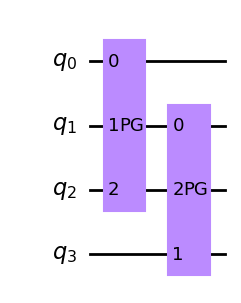

In [15]:
# Create a reusable FA gate
qc = QuantumCircuit(4)

# Add the gates
qc.append(Peres_Gate, qargs=[0,1,2])
fa_qc = qc.compose(Peres_Gate, [1,3,2])
FA = fa_qc.to_gate(label="FA")

fa_qc.draw(output="mpl")


## Create a 1 bit FA using the custom gate

The FA outputs on the last Peres Gate:
* `Carry` on the 2^nd line
* `Sum` on the 3^rd line

hence, in the hist plot, the result muust be read as follows: `sc` (sum, carry)

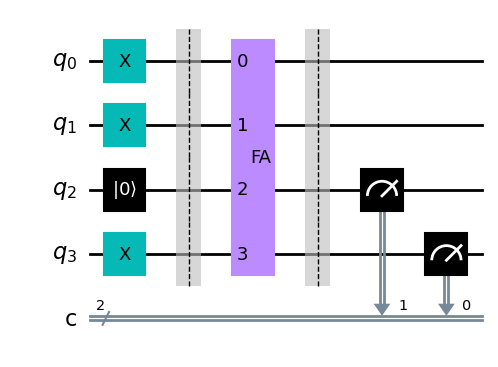

In [16]:
qc = QuantumCircuit(4,2)

# Encode the input

C_in = 1

# encode 0 and 1 as inputs
a = 1
b = 1

if a:
    qc.x(0)
else:
    qc.reset(0) # A

if b:
    qc.x(1)
else:
    qc.reset(1)
    
qc.reset(2) # ancilla

if C_in == 0:
    qc.reset(3) # C_in
else:
    qc.x(3)

# Execute the operations
qc.barrier()
qc.append(FA, qargs=[0,1,2,3])

# measure
qc.barrier()
qc.measure(2,1) # carry -> MSB
qc.measure(3,0) # sum   -> LSB

qc.draw(output='mpl')

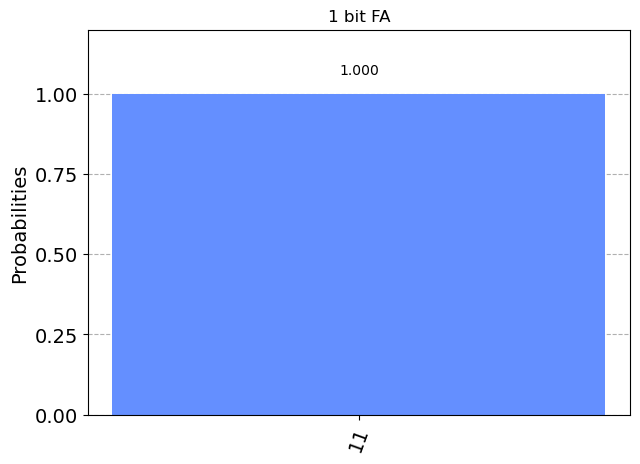

In [17]:
# Run the program on a simulator
backend = AerSimulator() #Aer.get_backend('aer_simulator')

# transpile the circuit
qc_compiled = transpile(qc, backend)

# execute the circuit
job_sim = backend.run(qc_compiled, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc_compiled)

# plot the histogram
plot_histogram(counts, title="1 bit FA")

## Create a 2 bit FA using the Peres gate

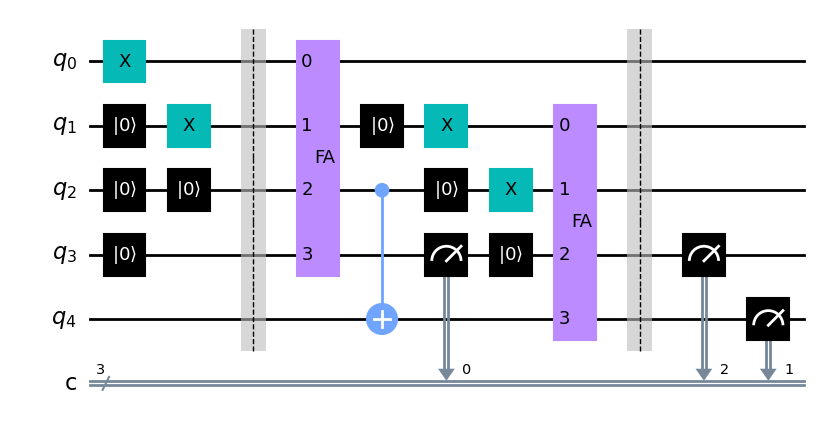

In [18]:
qc = QuantumCircuit(5,3)

# Encode the input
#qc.reset(0) # a_0
qc.reset(1) # b_0
qc.reset(2) # ancilla


#  0 C_in
# 11 a
# 11 b
#---
#110 c_out (first bit), s (remaining bits)


a = 1
b = 1

if a:
    qc.x(0)
else:
    qc.reset(0) # A

if b:
    qc.x(1)
else:
    qc.reset(1)

# ancilla
qc.reset(2) 

# C_in
C_in = 0

if C_in == 0:
    qc.reset(3)
else:
    qc.x(3)

qc.barrier()
# Perform the operations

qc.append(FA, qargs=[0,1,2,3])

# Copy the carry
qc.cx(2, 4)

# Measure s_0
qc.measure(3,0)

# Reset the ancilla
qc.reset(3)

# Encode the second bits input
a_1 = 1
b_1 = 1

if a_1: # a_1 = 1
    qc.reset(1)
    qc.x(1)
else:   # a_1 = 0
    qc.reset(1)


if b_1: # b_1 = 1
    qc.reset(2)
    qc.x(2)
else:   # b_1 = 0
    qc.reset(2)


qc.append(FA, qargs=[1,2,3,4])
qc.barrier()

# Measure
qc.measure(3,2)
qc.measure(4,1)


qc.draw(output='mpl')

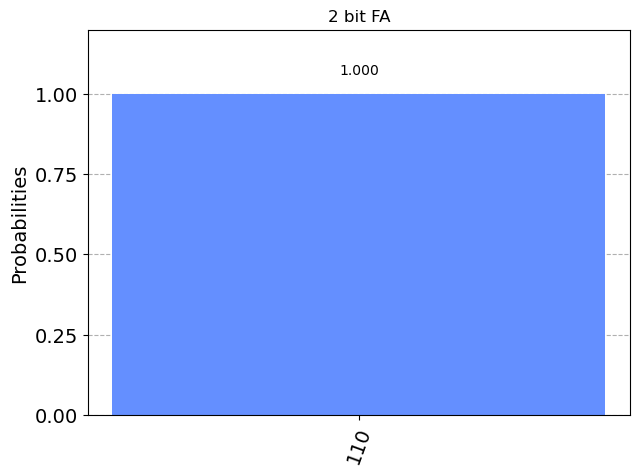

In [19]:
# Run the program on a simulator
backend = AerSimulator() #Aer.get_backend('aer_simulator')

# transpile the circuit
qc_compiled = transpile(qc, backend)

# execute the circuit
job_sim = backend.run(qc_compiled, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc_compiled)

# plot the histogram
plot_histogram(counts, title="2 bit FA")

## Create a 1 bit CSA

In [20]:
# Create a 2 bit FA using the Peres gate

# Encode the input
def encode_input(input, operand=0, op_length=2, qc=qc):
    input = input[::-1]
    for i in range(op_length):
        if input[i] == '1':
            #qc.x(i + (operand*op_length))
            qc.x( (i * op_length) + operand)
        else:
            #qc.reset(i + (operand*op_length))
            qc.reset( (i * op_length) + operand)



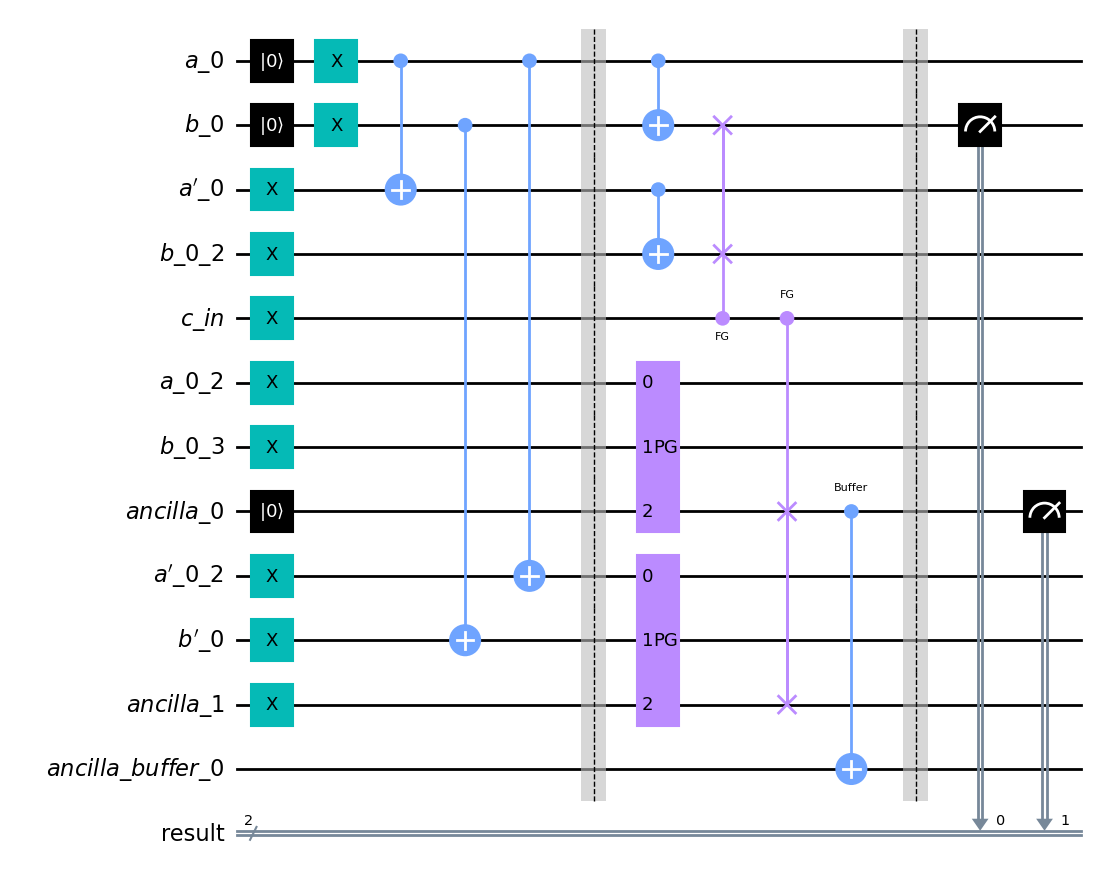

In [21]:
def encode_input(line, val):
    if val == 0:
        qc.reset(line)
    else:
        qc.reset(line)
        qc.x(line)

a_0 = QuantumRegister(1, name="a_0")
b_0 = QuantumRegister(1, name="b_0")
a_not_0 = QuantumRegister(1, name="a'_0")
a_not_0_2 = QuantumRegister(1, name="a'_0_2")
b_0_2 = QuantumRegister(1, name="b_0_2")
b_0_3 = QuantumRegister(1, name="b_0_3")
a_0_2 = QuantumRegister(1, name="a_0_2")
b_not_0 = QuantumRegister(1, name="b'_0")

C_in = QuantumRegister(1, name="c_in")

ancilla_0 = AncillaRegister(1, name="ancilla_0")
ancilla_buffer_0 = AncillaRegister(1, name="ancilla_buffer_0")
ancilla_1 = AncillaRegister(1, name="ancilla_1")

result = ClassicalRegister(2, name="result")

qc = QuantumCircuit(a_0, b_0, a_not_0, b_0_2, C_in , a_0_2, b_0_3, ancilla_0, a_not_0_2, b_not_0, ancilla_1, ancilla_buffer_0, result)


# Encode the input
qc.reset(a_0) # a

qc.x(a_0)
qc.x(a_0_2)

qc.reset(b_0) # b

qc.x(b_0)
qc.x(b_0_2)
qc.x(b_0_3)

qc.x(C_in)    # C_in
qc.reset(ancilla_0)
qc.x(ancilla_1)

qc.x(a_not_0)
qc.x(a_not_0_2)
qc.cnot(a_0, a_not_0)
qc.cnot(a_0, a_not_0_2)
qc.x(b_not_0)
qc.cnot(b_0, b_not_0)

# Perform the operations
qc.barrier()
qc.cnot(control_qubit=a_0, target_qubit=b_0)
qc.cnot(control_qubit=a_not_0, target_qubit=b_0_2)
qc.append(Peres_Gate, qargs=[a_0_2, b_0_3, ancilla_0])
qc.append(Peres_Gate, qargs=[a_not_0_2, b_not_0, ancilla_1])
qc.cswap(C_in, b_0, b_0_2, label="FG")
qc.cswap(C_in, ancilla_0, ancilla_1, label="FG")

# Buffer
qc.cnot(ancilla_0, ancilla_buffer_0, label="Buffer" )

# Measure the output
qc.barrier()
qc.measure(b_0, 0) # sum
qc.measure(ancilla_0, 1) # carry -> measure the carry out only for the MSB
 
qc.draw(output='mpl')


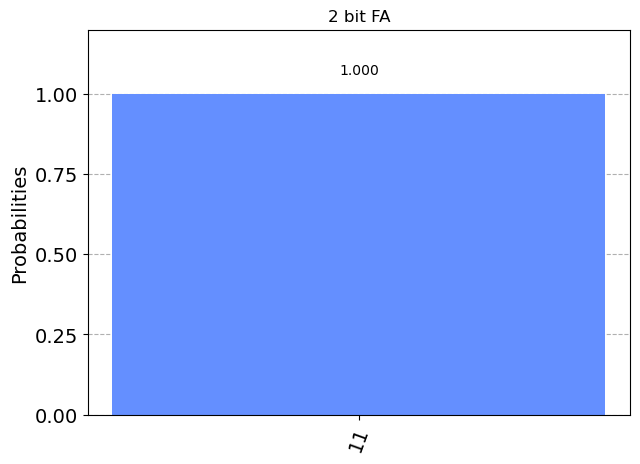

In [22]:
# Run the program on a simulator
backend = AerSimulator() #Aer.get_backend('aer_simulator')

# transpile the circuit
qc_compiled = transpile(qc, backend)

# execute the circuit
job_sim = backend.run(qc_compiled, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc_compiled)

# plot the histogram
plot_histogram(counts, title="2 bit FA")

## Create a modular 1 bit CSA

### v1
one line for c_in

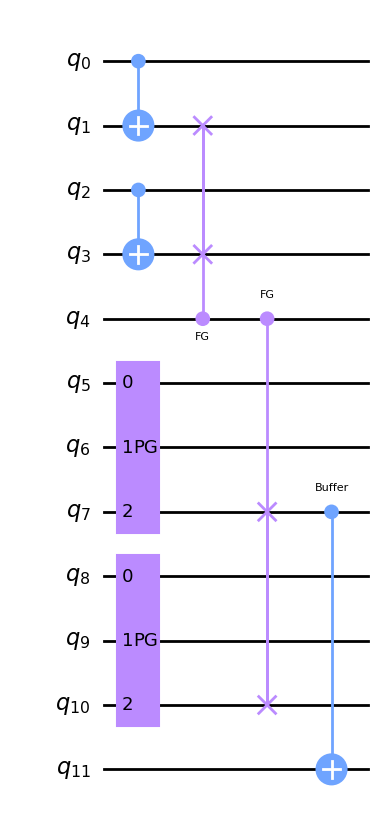

In [23]:
sub_qc = QuantumCircuit(12, name="1bit CSA")


sub_qc.cnot(control_qubit=0, target_qubit=1)
sub_qc.cnot(control_qubit=2, target_qubit=3)
sub_qc.append(Peres_Gate, qargs=[5,6,7])
sub_qc.append(Peres_Gate, qargs=[8,9,10])
sub_qc.cswap(4,3,1, label="FG")
sub_qc.cswap(4,7,10, label="FG")

# Buffer
sub_qc.cnot(7, 11, label="Buffer" )



# Measure the output -> it could be transformed into a subcircuit
#sub_qc.barrier()
#sub_qc.measure(1, 0) # sum
##sub_qc.measure(ancilla_0, 1) # carry -> measure the carry out only for the MSB


# Transform this sub_circuit to a reusable set of instructions:
CSA_adder = sub_qc.to_instruction()

sub_qc.draw(output='mpl')



### v2
two lines for c_in

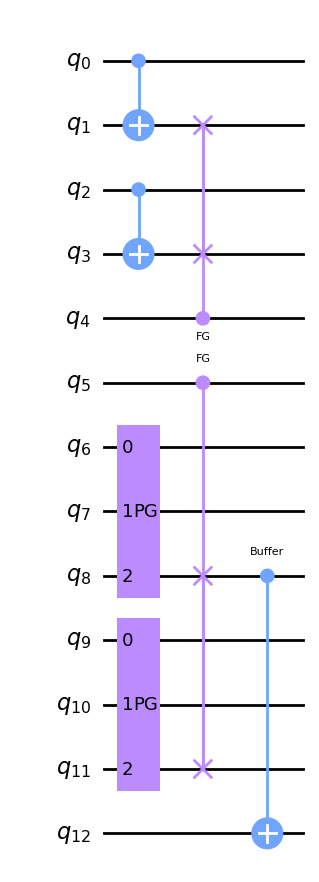

In [24]:
sub_qc = QuantumCircuit(13, name="1bit CSA")


sub_qc.cnot(control_qubit=0, target_qubit=1)
sub_qc.cnot(control_qubit=2, target_qubit=3)
sub_qc.append(Peres_Gate, qargs=[6,7,8])
sub_qc.append(Peres_Gate, qargs=[9,10,11])
sub_qc.cswap(4,3,1, label="FG")
sub_qc.cswap(5,8,11, label="FG")

# Buffer
sub_qc.cnot(8, 12, label="Buffer" )



# Measure the output -> it could be transformed into a subcircuit
#sub_qc.barrier()
#sub_qc.measure(1, 0) # sum
##sub_qc.measure(ancilla_0, 1) # carry -> measure the carry out only for the MSB


# Transform this sub_circuit to a reusable set of instructions:
CSA_adder = sub_qc.to_instruction()

sub_qc.draw(output='mpl')



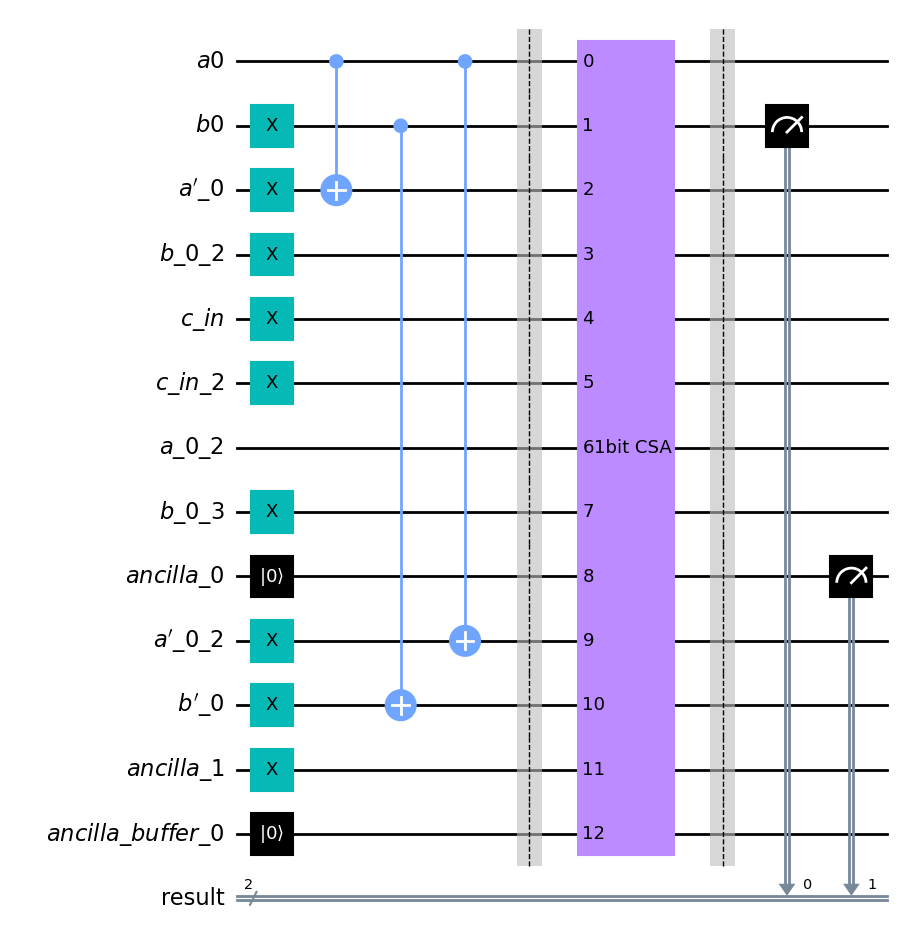

In [25]:
qc = QuantumCircuit()

RCSA_inputs = ["a0", "b0", "a'_0", "b_0_2", "c_in", "c_in_2" , "a_0_2", "b_0_3", "ancilla_0", "a'_0_2", "b'_0", "ancilla_1", "ancilla_buffer_0"] # replace the hardcoded '0' with for i in range(n_bit) -> {}.fomrat(i)
n_bit = 1

# Add the quantum register for the inputs
for i in range (len(RCSA_inputs)):
    qc.add_register(QuantumRegister(1, RCSA_inputs[i]))

# Add the classical register for the outputs
qc.add_register(ClassicalRegister(n_bit + 1, "result")) # 1 sum + 1 carry bit


# Encode the input
a = "0"
b = "1"
c_in = "1"


def encode_input(a,b,c_in):

    # encode a
    a_pos = [0, 6]
    
    for ix in a_pos:
        #qc.reset(ix)
        if a ==  "1":
            qc.x(ix)

    # encode a'
    a_not_pos = [2, 9]
    for ix in a_not_pos:
        qc.x(ix)
        qc.cnot(0, ix)

    # encode b
    b_pos = [1,3,7]
    
    for ix in b_pos:
        #qc.reset(ix)
        if b ==  "1":
            qc.x(ix)
    
    # encode b'
    b_not_pos = [10]

    for ix in b_not_pos:
        qc.x(ix)
        qc.cnot(1, ix)
        


    # encode c_in
    if c_in == "0":
        qc.reset(4)
        qc.reset(5)
    else:
        qc.x(4)
        qc.x(5)

    # encode ancilla_0
    qc.reset(8)

    # encode ancilla_1
    qc.x(11)

    # encode ancilla_buffer_0
    qc.reset(12)

encode_input(a,b,c_in)

qc.barrier()

# reuse the subcircuit
qc.append(CSA_adder, qargs=[0,1,2,3,4,5,6,7,8,9,10,11,12])

# measure the output
qc.barrier()
qc.measure(1, 0) # sum
qc.measure(8, 1) # carry 


qc.draw(output='mpl')

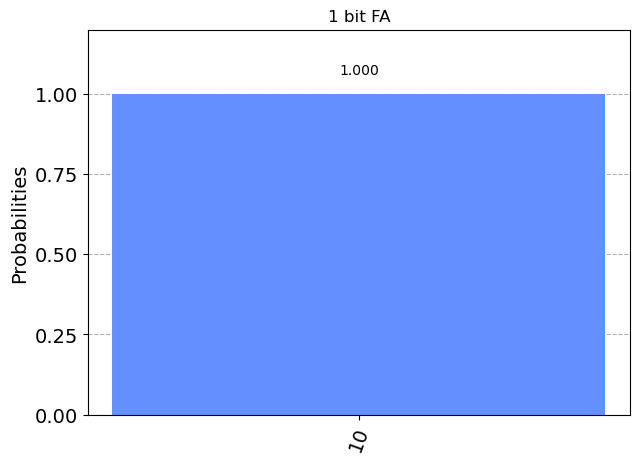

In [26]:
# Run the program on a simulator
backend = AerSimulator() #Aer.get_backend('aer_simulator')

# transpile the circuit
qc_compiled = transpile(qc, backend)

# execute the circuit
job_sim = backend.run(qc_compiled, shots=1)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc_compiled)

# plot the histogram
plot_histogram(counts, title="1 bit FA")

## Create a 2 bit modular CSA

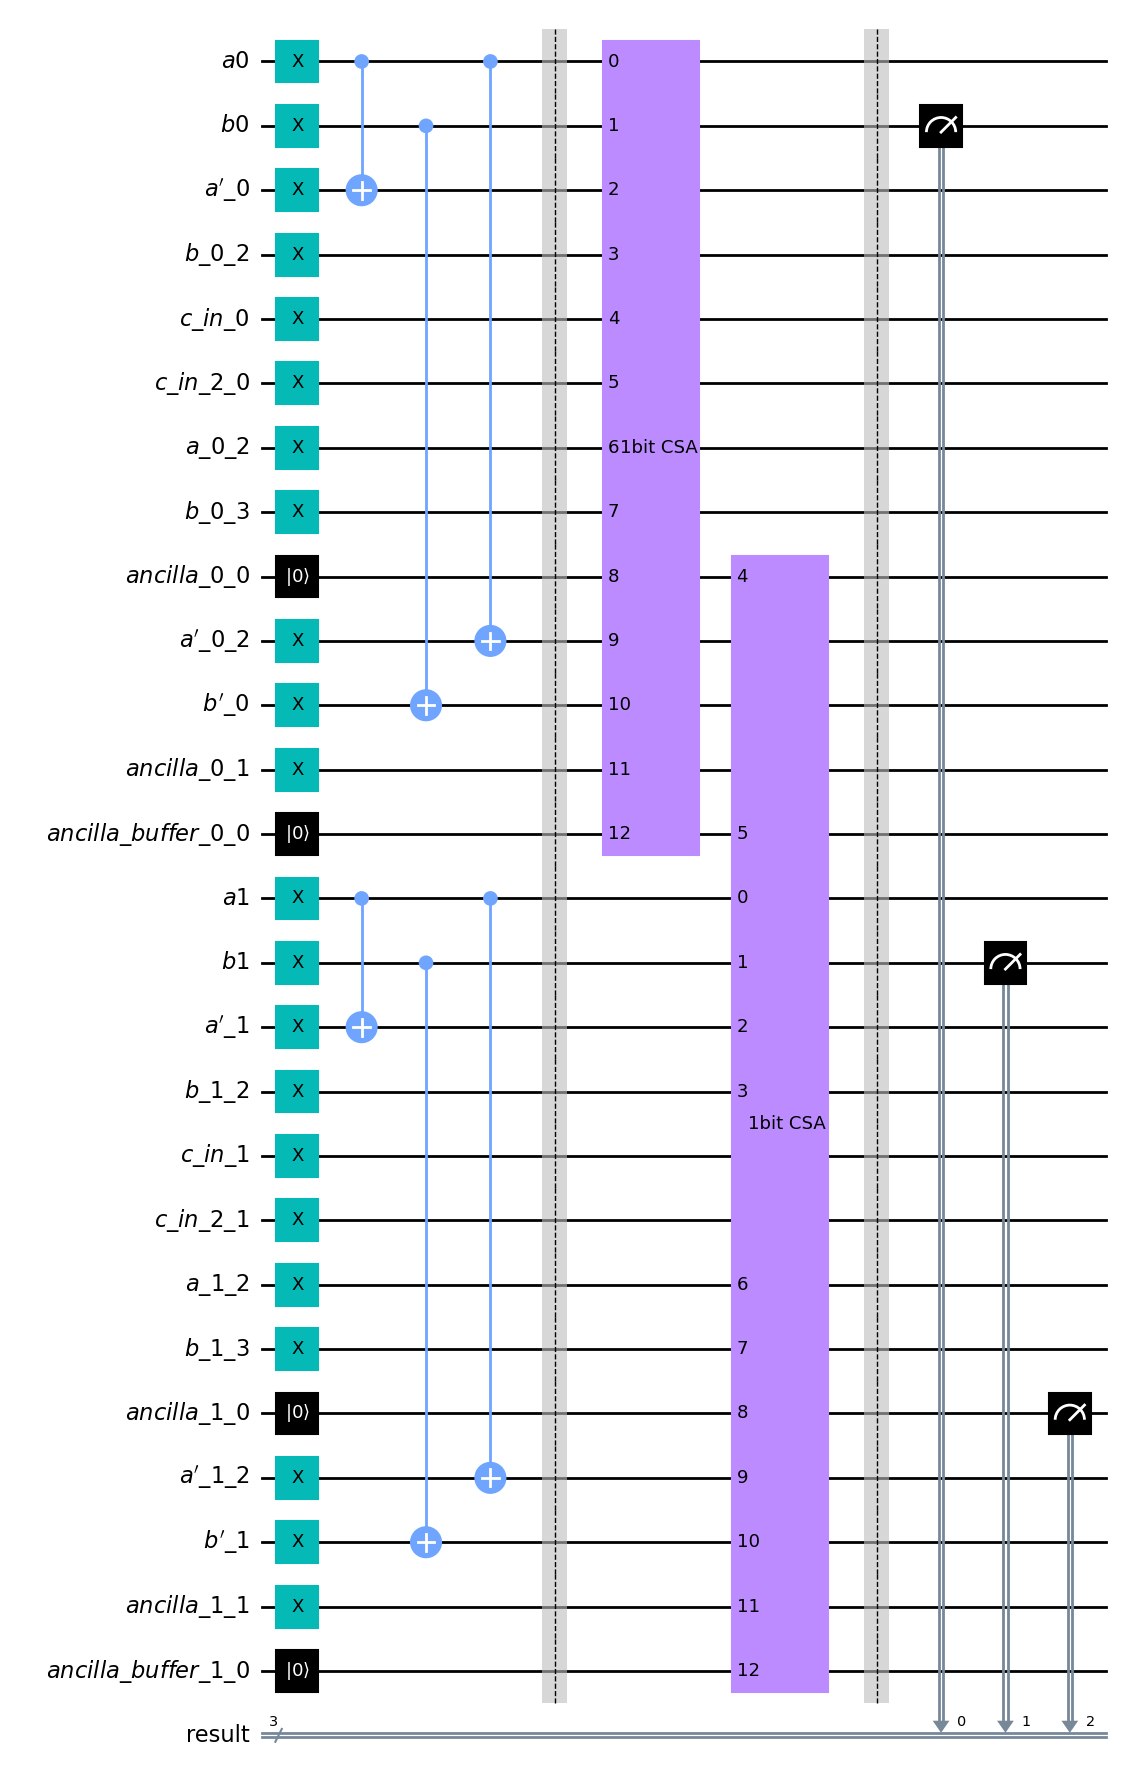

In [27]:
qc = QuantumCircuit()

RCSA_inputs = ["a{}", "b{}", "a'_{}", "b_{}_2", "c_in_{}", "c_in_2_{}" , "a_{}_2", "b_{}_3", "ancilla_{}_0", "a'_{}_2", "b'_{}", "ancilla_{}_1", "ancilla_buffer_{}_0"] # replace the hardcoded '0' with for i in range(n_bit) -> {}.fomrat(i)
n_inputs = len(RCSA_inputs)
n_bit = 2




# Add the quantum register for the inputs
for b in range(n_bit):
    #if b > 0:
    #    RCSA_inputs.pop(4)
    for i in range (len(RCSA_inputs)):
        qc.add_register(QuantumRegister(1, RCSA_inputs[i].format(b)))


# Add the classical register for the outputs
qc.add_register(ClassicalRegister(n_bit + 1, "result")) # 1 sum + 1 carry bit

# Encode the input
a = "11"
b = "11"
c_in = "1"


def encode_input(a,b,c_in, n_bit):

    a = a[::-1] # read from LSB to MSB
    b = b[::-1]


    # encode a
    a_pos = [0, 6]
    a_not_pos = [2, 9]
    b_pos = [1,3,7]
    b_not_pos = [10]

    for n in range(n_bit):

        
        for ix in a_pos:
            #qc.reset(ix)
            if a[n] ==  "1":
                qc.x(ix + n_inputs * n )

        # encode a'
        for ix in a_not_pos:
            qc.x(ix + n_inputs * n)
            qc.cnot(0 + n_inputs * n, ix + n_inputs * n)

        # encode b
        for ix in b_pos:
            #qc.reset(ix)
            if b[n] ==  "1":
                qc.x(ix + n_inputs * n)
        
        # encode b'
        for ix in b_not_pos:
            qc.x(ix + n_inputs * n)
            qc.cnot(1 + n_inputs * n, ix + n_inputs * n)
                


        # encode c_in
        if c_in == "0":
            qc.reset(4 + n_inputs * n)
            qc.reset(5 + n_inputs * n)
        else:
            qc.x(4 + n_inputs * n)
            qc.x(5 + n_inputs * n)

        # encode ancilla_0
        qc.reset(8 + n_inputs * n)

        # encode ancilla_1
        qc.x(11 + n_inputs * n)

        # encode ancilla_buffer_0
        qc.reset(12 + n_inputs * n)


encode_input(a,b,c_in, n_bit)

qc.barrier()

# reuse the subcircuit
for n in range(n_bit):
    if n == 0:
        qc.append(CSA_adder, qargs = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
    else:
        qc.append(CSA_adder, qargs=[0 + n_inputs * n, 1 + n_inputs * n, 2 + n_inputs * n, 3 + n_inputs * n, (4 + (n_inputs) * n) - 9, (5 + n_inputs * n) - 6, 6 + n_inputs * n, 7 + n_inputs * n, 8 + n_inputs * n, 9 + n_inputs * n, 10 + n_inputs * n, 11 + n_inputs * n, 12 + n_inputs * n])
        

qc.barrier()

# Measure the output
for i in range(n_bit):
    qc.measure(1 + n_inputs * i, i) #s_i

qc.measure(8 + n_inputs * (n_bit-1), n_bit) # c_i
    

qc.draw(output='mpl')

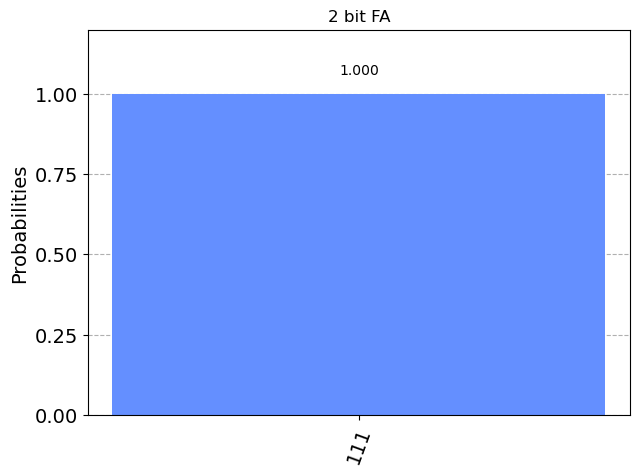

In [28]:
# Run the program on a simulator
backend = AerSimulator() #Aer.get_backend('aer_simulator')

# transpile the circuit
qc_compiled = transpile(qc, backend)

# execute the circuit
job_sim = backend.run(qc_compiled, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc_compiled)

# plot the histogram
plot_histogram(counts, title="2 bit FA")

## Create a 8 bit CSA

### Create a 8 x 1 bit CSAs

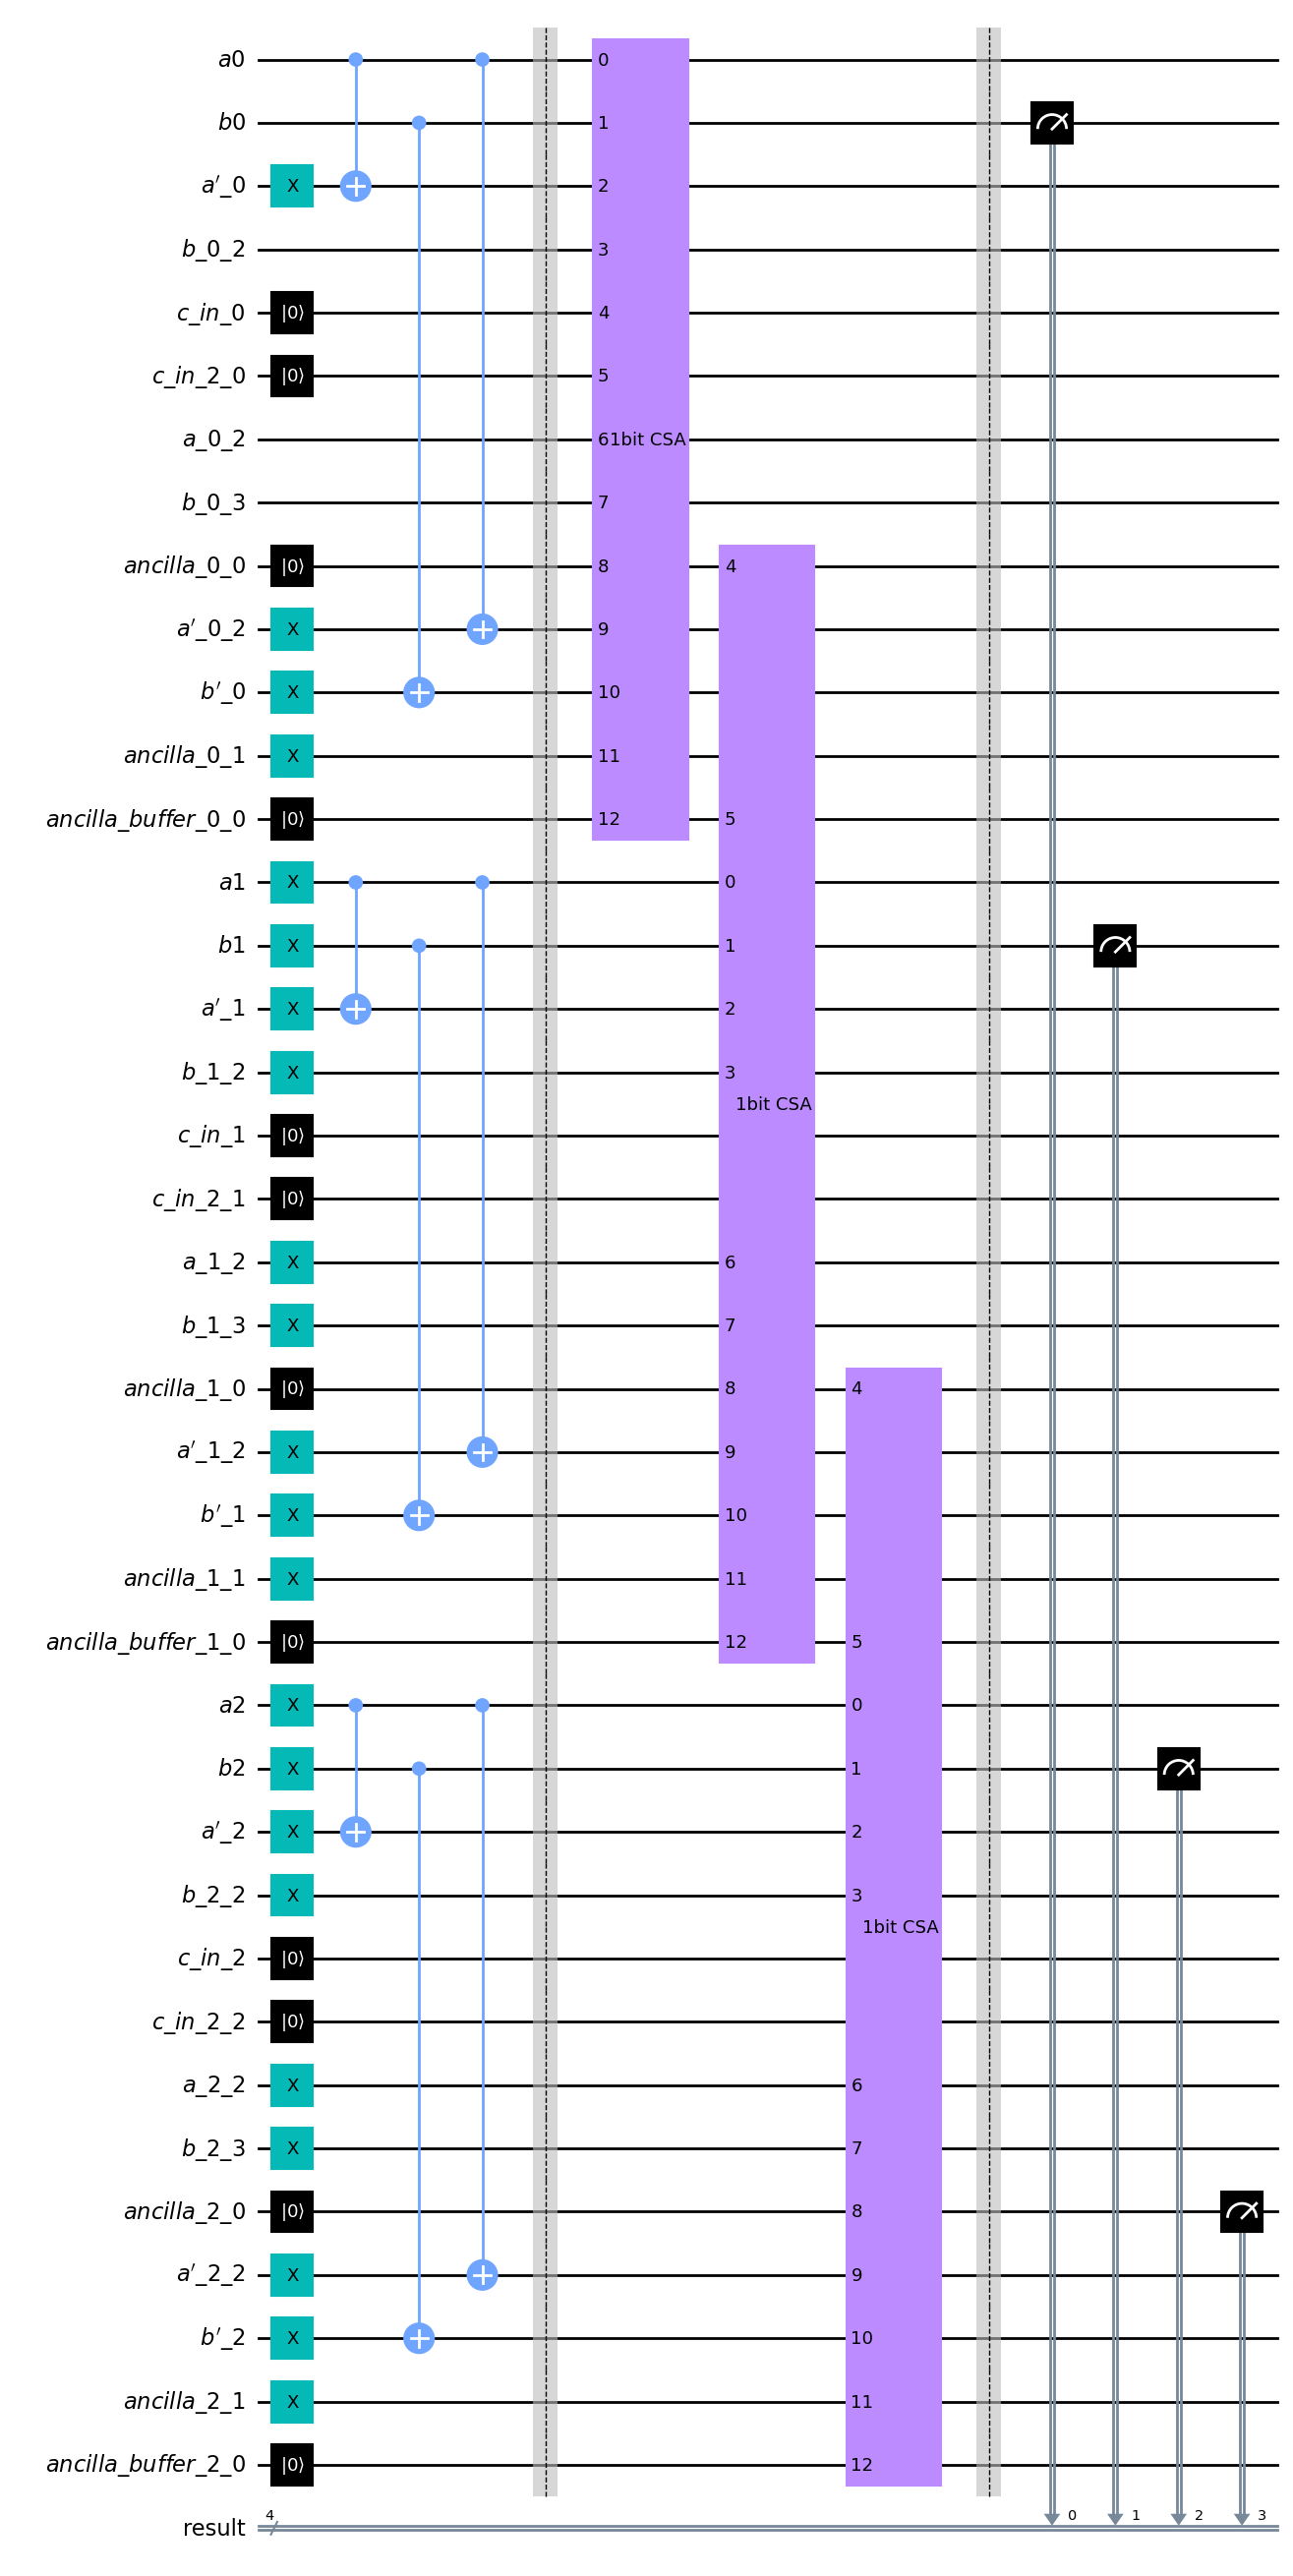

In [29]:
qc = QuantumCircuit()

RCSA_inputs = ["a{}", "b{}", "a'_{}", "b_{}_2", "c_in_{}", "c_in_2_{}" , "a_{}_2", "b_{}_3", "ancilla_{}_0", "a'_{}_2", "b'_{}", "ancilla_{}_1", "ancilla_buffer_{}_0"] # replace the hardcoded '0' with for i in range(n_bit) -> {}.fomrat(i)
n_inputs = len(RCSA_inputs)
n_bit = 3




# Add the quantum register for the inputs
for b in range(n_bit):
    #if b > 0:
    #    RCSA_inputs.pop(4)
    for i in range (len(RCSA_inputs)):
        qc.add_register(QuantumRegister(1, RCSA_inputs[i].format(b)))


# Add the classical register for the outputs
qc.add_register(ClassicalRegister(n_bit + 1, "result")) # 1 sum + 1 carry bit

# Encode the input
a = "110"
b = "110"
c_in = "0"

encode_input(a,b,c_in, n_bit)

qc.barrier()

# reuse the subcircuit
for n in range(n_bit):
    if n == 0:
        qc.append(CSA_adder, qargs = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
    else:
        qc.append(CSA_adder, qargs=[0 + n_inputs * n, 1 + n_inputs * n, 2 + n_inputs * n, 3 + n_inputs * n, (4 + (n_inputs) * n) - 9, (5 + n_inputs * n) - 6, 6 + n_inputs * n, 7 + n_inputs * n, 8 + n_inputs * n, 9 + n_inputs * n, 10 + n_inputs * n, 11 + n_inputs * n, 12 + n_inputs * n])
        

qc.barrier()

# Measure the output
for i in range(n_bit):
    qc.measure(1 + n_inputs * i, i) #s_i

qc.measure(8 + n_inputs * (n_bit-1), n_bit) # c_i
    

qc.draw(output='mpl')

In [31]:
# Run the program on a simulator
backend = AerSimulator() #Aer.get_backend('aer_simulator')

# transpile the circuit
qc_compiled = transpile(qc, backend)

# execute the circuit
job_sim = backend.run(qc_compiled, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc_compiled)

# plot the histogram
plot_histogram(counts, title="2 bit FA")

Simulation failed and returned the following error message:
ERROR:  [Experiment 0] Insufficient memory to run circuit circuit-947 using the statevector simulator. Required memory: 524288M, max memory: 8066M


QiskitError: 'Data for experiment "circuit-947" could not be found.'